Original Dataset From: Dataset from [cdc.gov](https://www.cdc.gov/reproductivehealth/data_stats/abortion.htm)
Cleaned and Combined Dataset In: `Data Cleaning/cdc dataset cleaning and aggregation.ipynb`

In [220]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_pickle('../data/cdc_2010-2019.pkl')
df

,state_area_of_service,state_area_of_mothers_residence,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,Alabama,8587.0,7989.0,7464.0,6997.0,6650.0,5124.0,5525.0,5223.0,5455.0,4969.0
1,Alaska,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,Alabama,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,California**,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2491,Virginia,Out-of-state (exact residence unknown),0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2492,Washington,Out-of-state (exact residence unknown),0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2493,West Virginia,Out-of-state (exact residence unknown),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2494,Wisconsin,Out-of-state (exact residence unknown),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 2495
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state_area_of_service            2496 non-null   object 
 1   state_area_of_mothers_residence  2496 non-null   object 
 2   2010                             1576 non-null   float64
 3   2011                             1575 non-null   float64
 4   2012                             1573 non-null   float64
 5   2013                             1559 non-null   float64
 6   2014                             1662 non-null   float64
 7   2015                             1712 non-null   float64
 8   2016                             1678 non-null   float64
 9   2017                             1631 non-null   float64
 10  2018                             1647 non-null   float64
 11  2019                             1699 non-null   float64
dtypes: float64(10), obje

In [189]:
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1576.000000,1575.000000,1573.000000,1559.000000,1662.000000,1712.000000,1678.000000,1631.000000,1647.000000,1699.000000
mean,356.204949,336.137143,323.486968,311.566389,285.477136,272.046145,274.997616,277.352544,281.432301,276.917599
std,3024.523035,2855.913947,2750.647561,2619.887929,2394.834369,2342.069297,2344.407983,2332.033276,2399.004360,2426.340543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,74830.000000,69865.000000,66001.000000,61231.000000,53128.000000,52963.000000,52331.000000,52103.000000,53887.000000,55966.000000


In [199]:
mdf = df.melt(['state_area_of_service', 'state_area_of_mothers_residence']).rename({'variable': 'year'}, axis=1)#.plot(x='year', y='value')
mdf

,state_area_of_service,state_area_of_mothers_residence,year,value
0,Alabama,Alabama,2010,8587.0
1,Alaska,Alabama,2010,0.0
2,Arizona,Alabama,2010,0.0
3,Arkansas,Alabama,2010,NaN
4,California**,Alabama,2010,NaN
...,...,...,...,...
24955,Virginia,Out-of-state (exact residence unknown),2019,NaN
24956,Washington,Out-of-state (exact residence unknown),2019,0.0
24957,West Virginia,Out-of-state (exact residence unknown),2019,0.0
24958,Wisconsin,Out-of-state (exact residence unknown),2019,NaN


<AxesSubplot:xlabel='year,state_area_of_mothers_residence'>

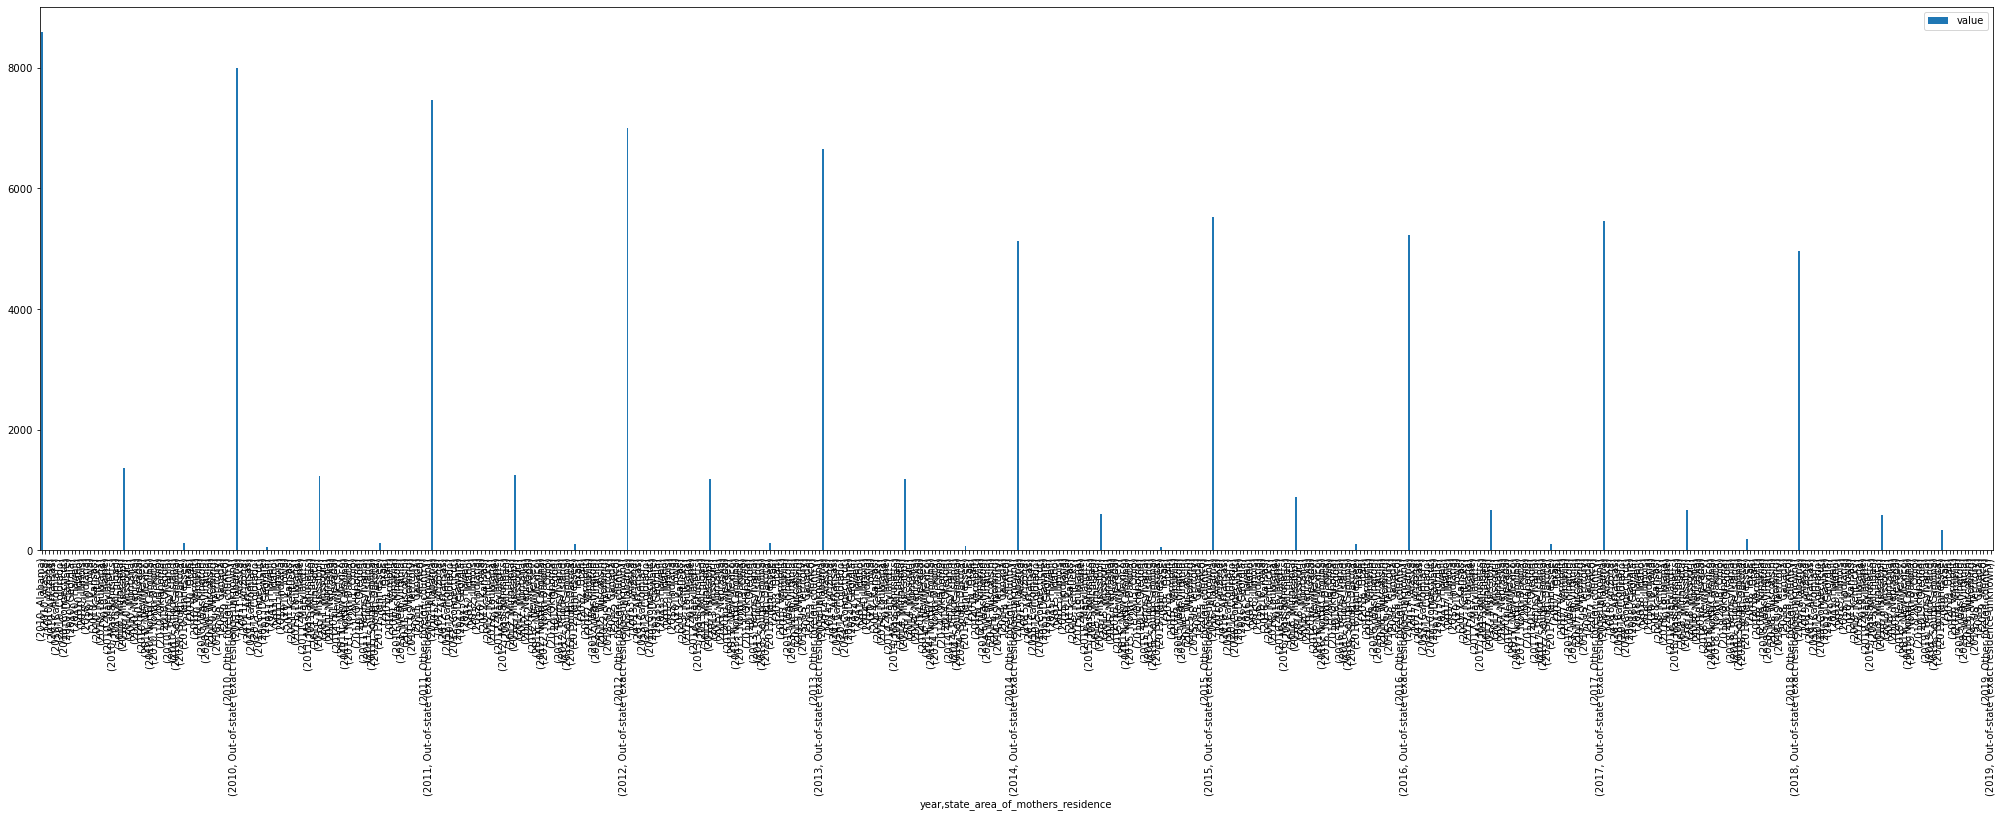

In [211]:
mdf[mdf['state_area_of_service'] == 'Alabama'].set_index(['year','state_area_of_mothers_residence']).plot(kind='bar', figsize=(35, 10))

<AxesSubplot:xlabel='state_area_of_mothers_residence'>

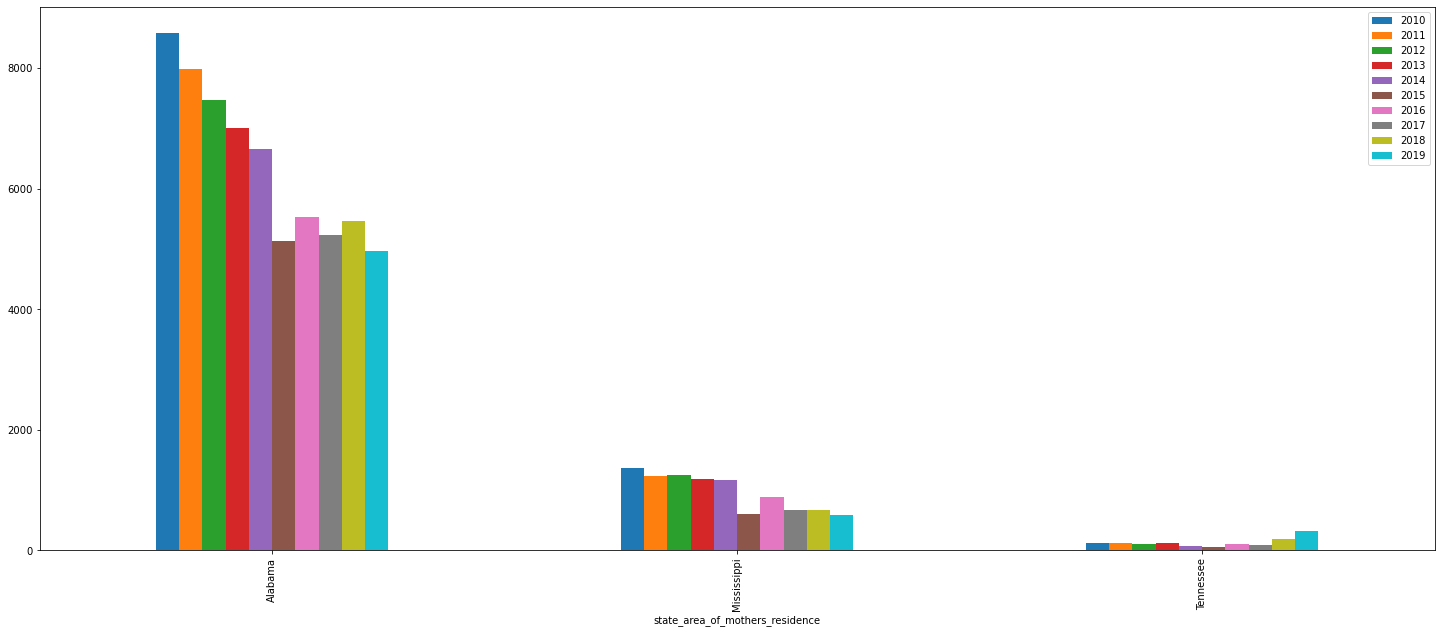

In [218]:
df[df['state_area_of_service'] == 'Alabama'].set_index('state_area_of_mothers_residence').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='state_area_of_service'>

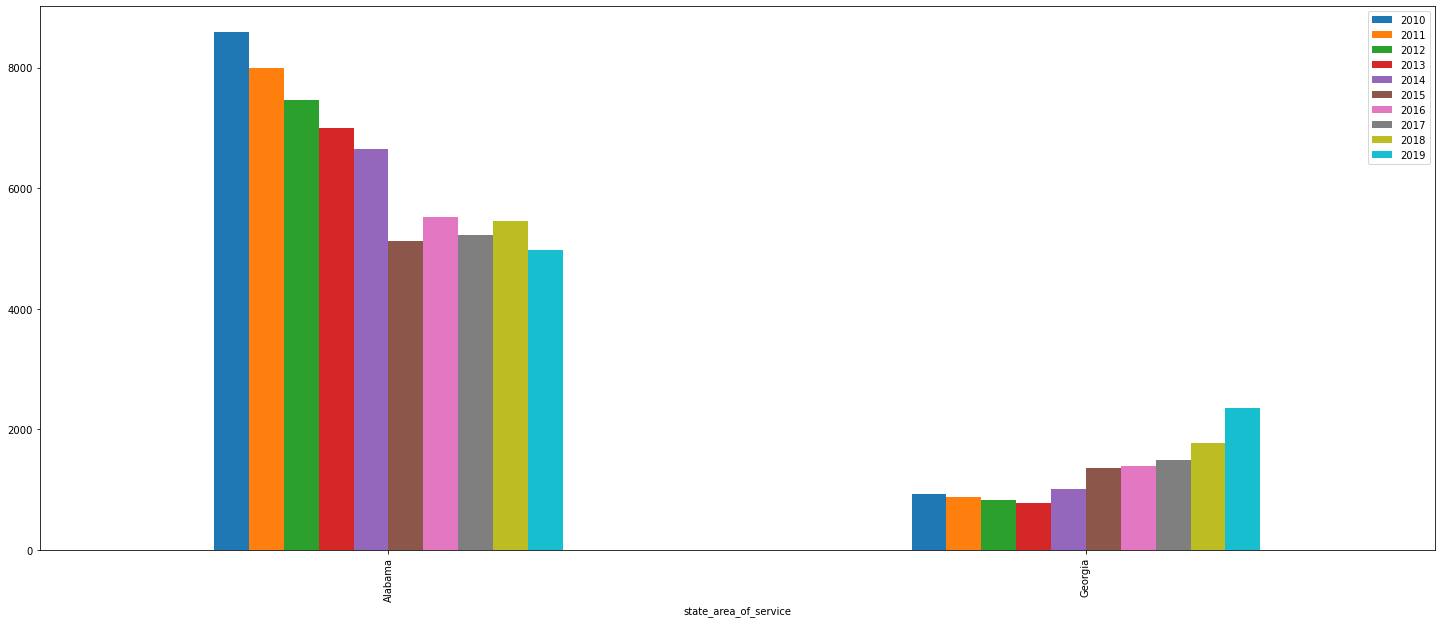

In [219]:
df[df['state_area_of_mothers_residence'] == 'Alabama'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='state_area_of_service'>

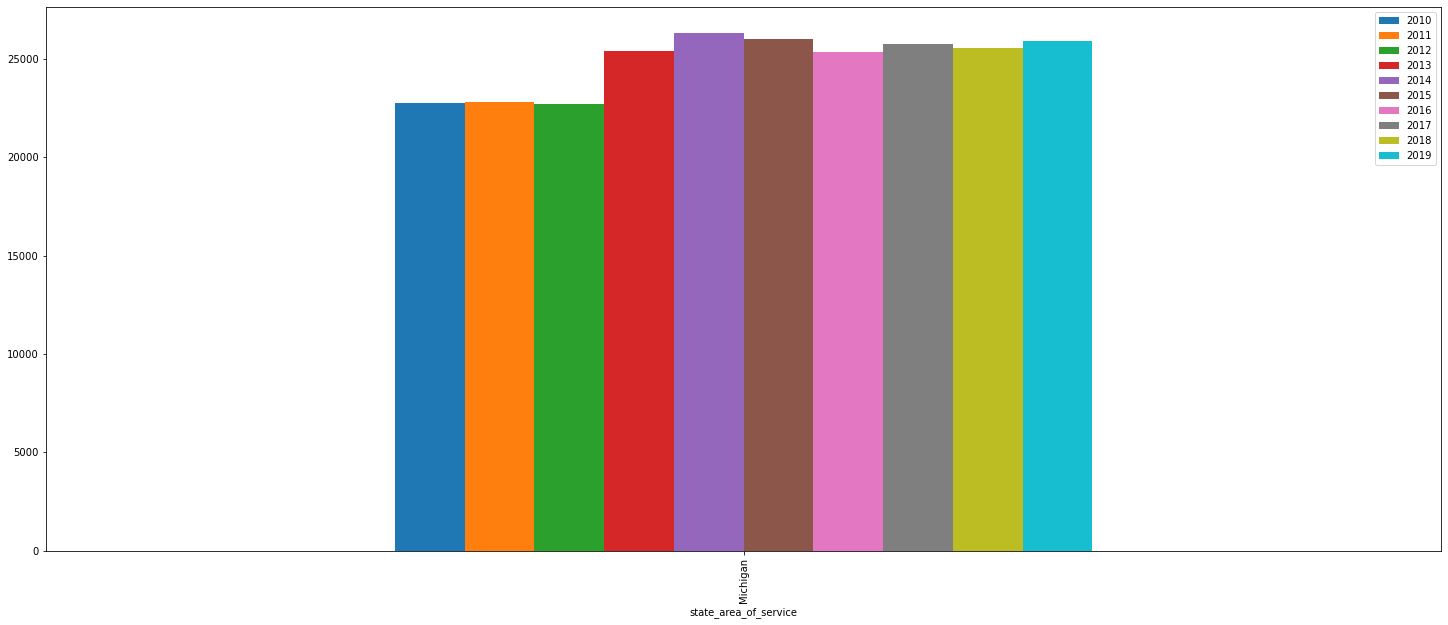

In [221]:
df[df['state_area_of_mothers_residence'] == 'Michigan'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='state_area_of_service'>

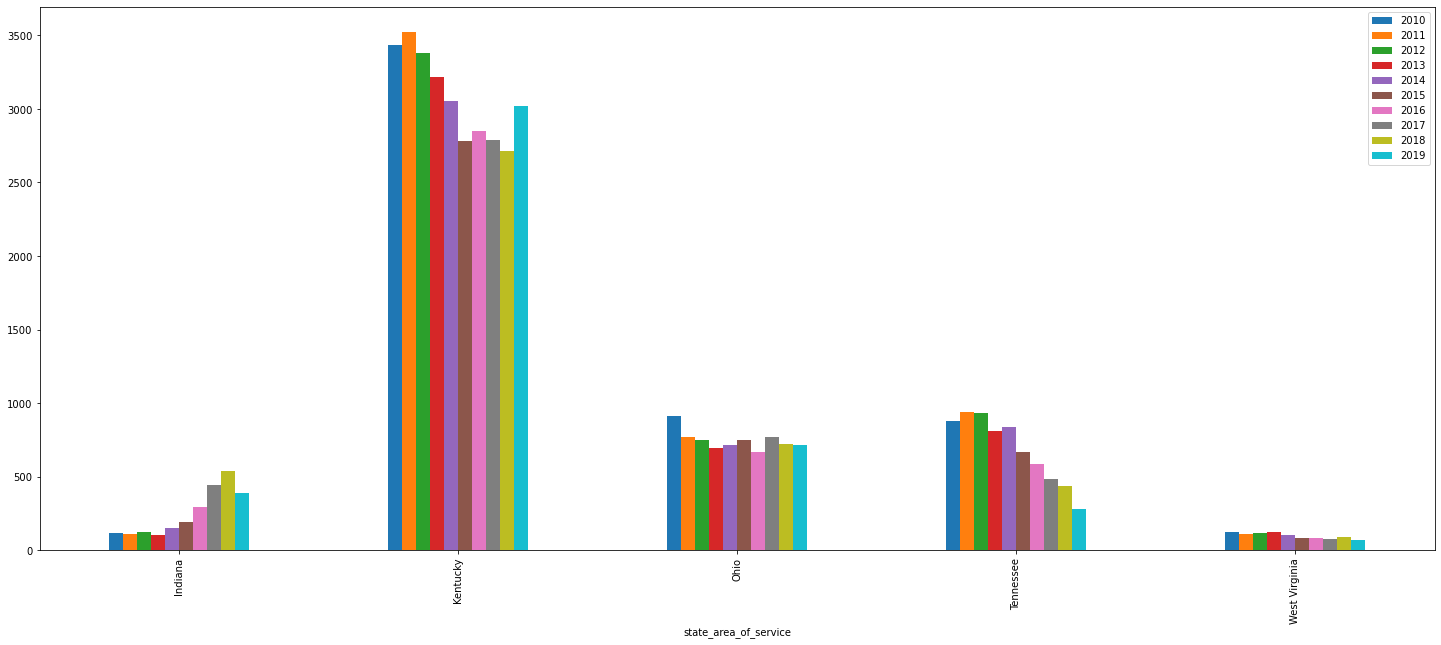

In [222]:
df[df['state_area_of_mothers_residence'] == 'Kentucky'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

According to [this](https://www.verywellhealth.com/abortion-access-ranking-states-5202659),

> Top 3 Worst States for Abortion Access
> To determine the bottom three states for abortion access, we looked at the percentage of the state’s population of reproductive-aged women that live in counties without abortion providers.
> The bottom three states for abortion access are:
> - West Virginia
> - Missouri
> - Wyoming

<AxesSubplot:xlabel='state_area_of_service'>

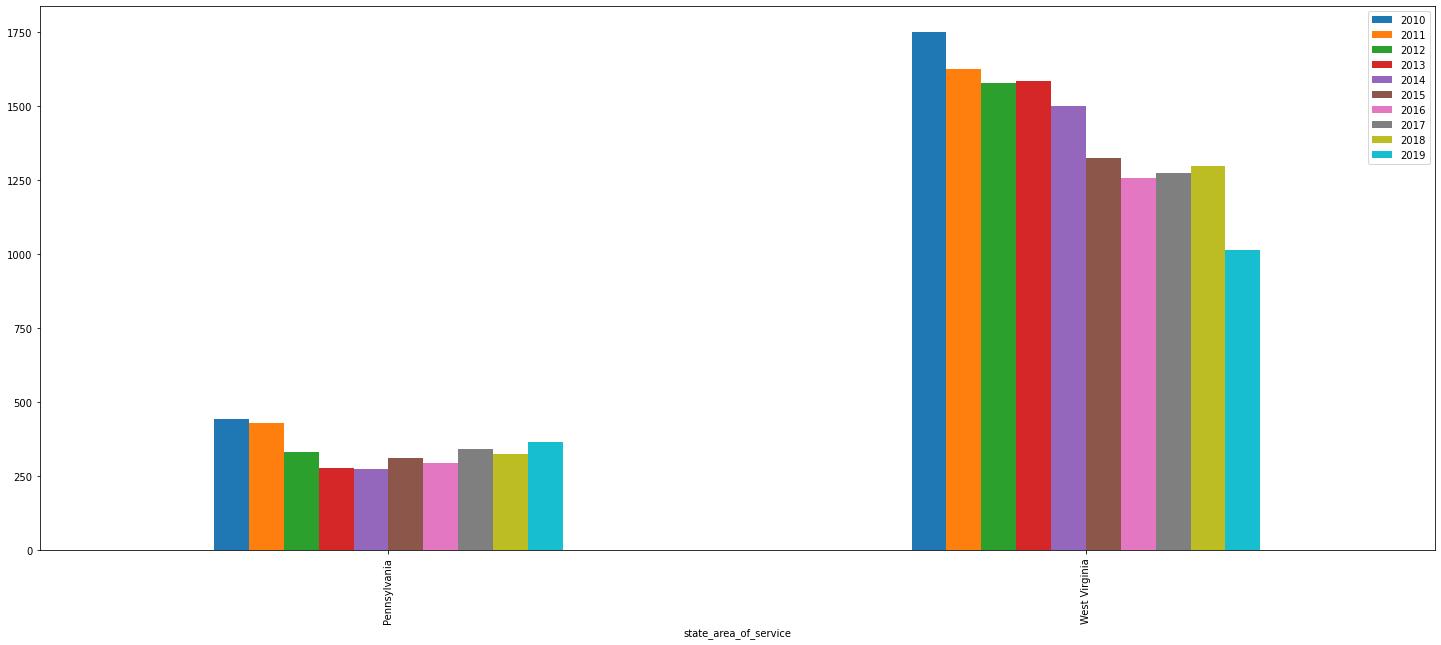

In [223]:
df[df['state_area_of_mothers_residence'] == 'West Virginia'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='state_area_of_service'>

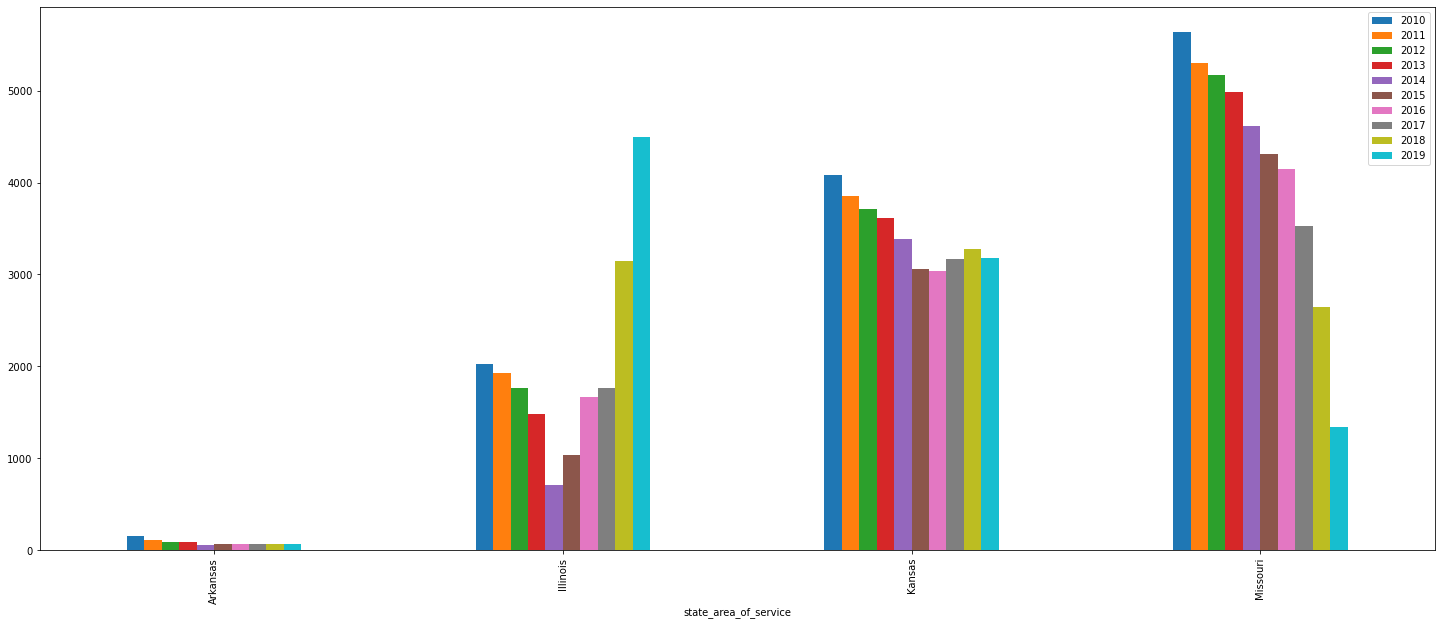

In [224]:
df[df['state_area_of_mothers_residence'] == 'Missouri'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='state_area_of_service'>

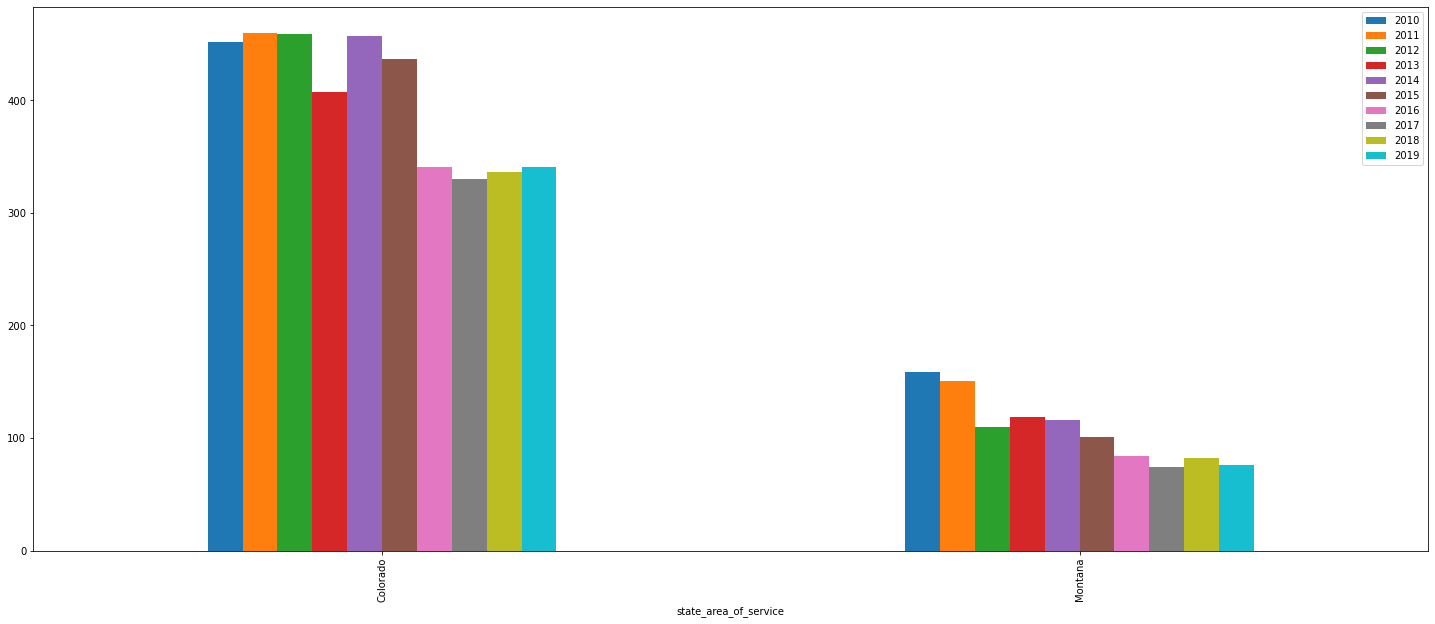

In [225]:
df[df['state_area_of_mothers_residence'] == 'Wyoming'].set_index('state_area_of_service').replace(0, np.nan).dropna().plot(kind='bar', figsize=(25, 10))

That is sad.  Women with residence in Wyoming are not having their procedures done in Wyoming at all.  They are, according to this data, all going to Colorado and Montana.